# Lab2 Introduction to Scikit-learn
**Authors: Renfei Wang, Qi Song**

Introduction to Datamining  
instructor: Michael Burkhardt  
Spet. 29th 2019

import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn import preprocessing
import numpy as np
from sklearn import metrics
import pylab as pl

## 1. Load and visualize the data

In [47]:
path = pathlib.Path('../data/lab2.csv')

In [48]:
df = pd.read_csv(path.absolute())

# 1. Load and Visualize the Data

The data has already been loaded, the scatter plot with different class rendered by different color.  
As we can see from the graph, there is no clear boundary of these two classes, but the data points with class 1 are tend
to appear on the lower section to the left and class 0 data points are tends to appear on the upper side to the right.

Text(0.5, 0.98, 'Plot by Class')

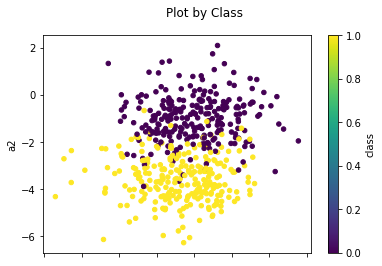

In [49]:
df.plot.scatter(x = 'a1', y = 'a2', c='class', colormap = 'viridis')
pl.suptitle('Plot by Class')

Other visualization of the dataset are shown as follow

The following figure is the kernel density of the two attribute(a1 and a2).  

Text(0.5, 0.98, 'Kernel density of attributes')

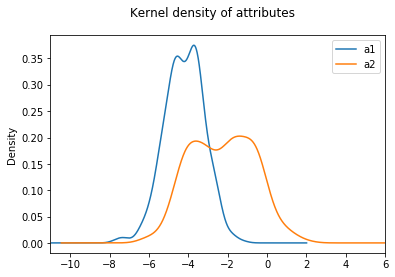

In [50]:
df.drop(columns=['class']).plot.kde(xlim=(-11,6))
pl.suptitle('Kernel density of attributes')

The following figure shows that the box plot according to the two attributes.

Text(0.5, 0.98, 'Box plot of attributes range')

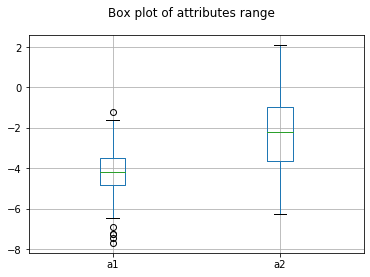

In [51]:
df.boxplot(column=['a1','a2'])
pl.suptitle('Box plot of attributes range')

From the above two plots, we can see that these two attributes have basically close range with each other, which a1 is 
majorly distributed in the section of -6 to -2, and a2 is majorly distributed in the range of -6 to 2. This suggests that
we might want to do a linear transformation to each of these attributes to assure that they have exactly the same range,
so that distance based classifier (K-NN in this case) will not be defected in performance.

The follow two graphs shows the boxplot of each of the two attributes based on different class.
As we can see from the figures, the distribution of a1 doesn't change significantly given different class, 
and a2 changes significantly given different classes.

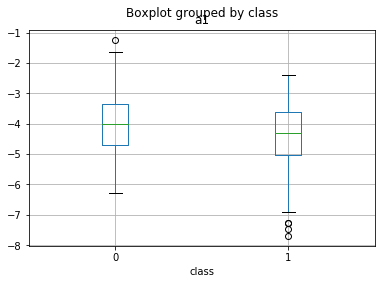

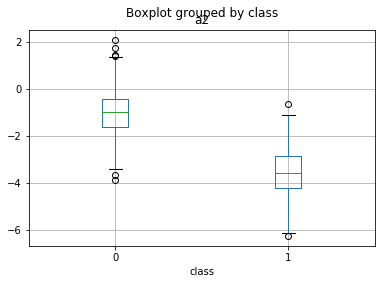

In [52]:
df.boxplot(column=['a1'], by='class')
df.boxplot(column=['a2'], by='class')

# 2. prepare the data

We have 500 data samples from the dataset. These data are further be separated  using 
sklearn.model_selection.train_test_split method with test_size set to 0.2.  Resulting a training dataset at the size of 
400 data entries and testing dataset with 100 data entries.

In [53]:
x = df[['a1','a2']]
y = df['class']

In [54]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
print("Using sklearn built in train_test_split method to split dataset")
print("After split dataset, we have training dataset at the size of %d, and testing set at the size of %d."
      %(len(x_train.index), len(x_test.index)))

Using sklearn built in train_test_split method to split dataset
After split dataset, we have training dataset at the size of 400, and testing set at the size of 100.


In [55]:
# rescale the data in to the arange of 0~1
min_max_scaler = preprocessing.MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(x_train)
x_test_scaled = min_max_scaler.transform(x_test)
x_train_origin = x_train
x_test_origin = x_test
x_train = x_train_scaled
x_test = x_test_scaled

Text(0.5, 0.98, 'Box plot of attributes range for training set (after rescaling)')

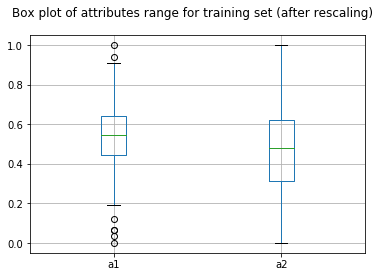

In [56]:
df_1 = pd.DataFrame(data=x_train, columns=['a1','a2'])
df_1.boxplot(column=['a1','a2'])
pl.suptitle('Box plot of attributes range for training set (after rescaling)')

Text(0.5, 0.98, 'Box plot of attributes range for testing set (after rescaling)')

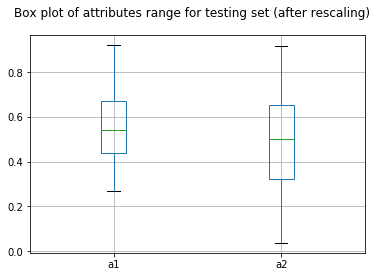

In [57]:
df_1 = pd.DataFrame(data=x_test, columns=['a1','a2'])
df_1.boxplot(column=['a1','a2'])
pl.suptitle('Box plot of attributes range for testing set (after rescaling)')

## 3. Train a classifier and classify the test records

#### 3.1 Train the model with training data

In [58]:
# using default param
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
# using grid search
param_grid=[{'n_neighbors':[1,2,3,4,5,6,7,8,10,12,14,16,20,24,28,32,64,128,256]}]
estimation_metric='accuracy'
clf_=GridSearchCV(neighbors.KNeighborsClassifier(),param_grid, cv=10,scoring=estimation_metric)
clf_.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14,
                                          16, 20, 24, 28, 32, 64, 128, 256]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [60]:
score = str(clf_.best_params_['n_neighbors'])
print("After a grid search on testing set with 10 fold validation, we have the best model with following number of nearest neighbors: "+
      score + " with the accuracy " + str(clf_.best_score_))

After a grid search on testing set with 10 fold validation, we have the best model with following number of nearest neighbors: 128 with the accuracy 0.9075


#### 3.2 Determine the accuracy score using the training data

In [61]:
print('Using the default parameter(n_neighbors=5) we have the following accuracy on the training set: '+
      str(clf.score(x_train, y_train))+
      '\nGiven the parameter from grid search, after retraining on the entire dataset, the following accuracy are gained from the training set: '
      + str(clf_.best_estimator_.score(x_train, y_train)))

Using the default parameter(n_neighbors=5) we have the following accuracy on the training set: 0.91
Given the parameter from grid search, after retraining on the entire dataset, the following accuracy are gained from the training set: 0.91


In [62]:
print('Using the default parameter(n_neighbors=5) we have the following accuracy on the test set: '+
      str(clf.score(x_test, y_test))+
      '\nGiven the parameter from grid search, after retraining on the entire dataset, the following accuracy are gained from the test set: '
      + str(clf_.best_estimator_.score(x_test, y_test)))

Using the default parameter(n_neighbors=5) we have the following accuracy on the test set: 0.91
Given the parameter from grid search, after retraining on the entire dataset, the following accuracy are gained from the test set: 0.91


#### 3.3 Classify the test records using the trained classifier

In [63]:
y_predict = clf.predict(x_test)

The following block provides other measurement on classification error  

recall is a measure of your model's completeness. Of all the points labeled 1, only 86% of the results returned were truly relevant. Of the entire dataset, 88% of the results were truly relevant.

In [64]:
print("Measurement on 5 nearest neighbor")
print(metrics.classification_report(y_test,y_predict))
print("Measurement on %d nearest neighbor(hyperparameter gained by grid search)"%clf_.best_params_['n_neighbors'])
y_predict_=clf_.best_estimator_.predict(x_test)
print(metrics.classification_report(y_test,y_predict_))

Measurement on 5 nearest neighbor
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        51
           1       0.93      0.88      0.91        49

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

Measurement on 128 nearest neighbor(hyperparameter gained by grid search)
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        51
           1       0.93      0.88      0.91        49

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



#### 3.4 plot the predictions and trues side by side

In [65]:
def plot_classification_result(mdl, x_test_, y_test_):
    y_predict_ = mdl.predict(x_test_)
    df_ = pd.DataFrame(data=x_test_, columns=['a1','a2'])
    if isinstance(y_test_,pd.DataFrame) or isinstance(y_test_,pd.Series):
        df_['class']=y_test_.values
    else:
        df_['class']=y_test_
    df_['predicted']=y_predict_
    plt.figure()
    # plt.subplot(121)
    df_.plot.scatter(x = 'a1', y = 'a2', c='class', colormap = 'viridis')
    pl.suptitle('True Labels')
    # plt.subplot(122)
    df_.plot.scatter(x='a1',y='a2',c='predicted',colormap='viridis')
    pl.suptitle('Predicted by Classifiers')

    plt.show()
    print("The accuracy of the predictions on the test set: ", mdl.score(x_test_, y_test_))

Plot of prediction result, 5-NN classifier


<Figure size 432x288 with 0 Axes>

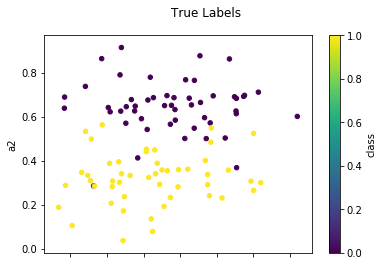

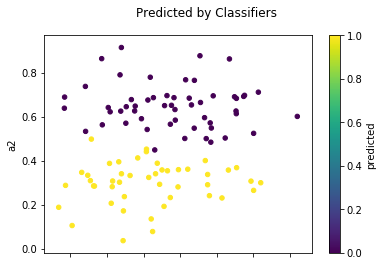

The accuracy of the predictions on the test set:  0.91


In [66]:
print("Plot of prediction result, 5-NN classifier")
plot_classification_result(clf, x_test, y_test)

Plot of prediction result, 128-NN classifier(hyperparameter tuned with grid search)


<Figure size 432x288 with 0 Axes>

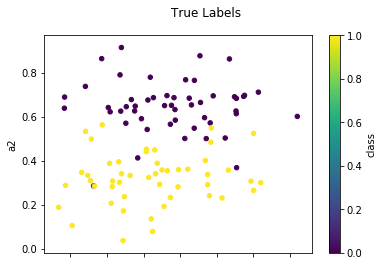

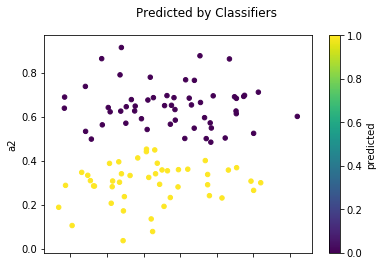

The accuracy of the predictions on the test set:  0.91


In [67]:
print("Plot of prediction result, %d-NN classifier(hyperparameter tuned with grid search)"%clf_.best_params_['n_neighbors'])
plot_classification_result(clf_.best_estimator_, x_test, y_test)